---
<h1 align='center' style='color:green'><b>Bay Area's Home Prices Prediction</b></h1>

---

## in order to predict the Bay area’s home prices, I choose the housing price dataset that was sourced from Bay Area Home Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015. It has many characteristics of learning

## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Load the dataset

In [2]:
data=pd.read_csv("data/final_data.csv")

### Apply descriptive statitics

In [3]:
data.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [4]:
data.tail()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
11325,17615,Address: 149 Laidley Street,San FranciscoSales price: 1950000Sales date: ...,149 Laidley St,2.0,3.0,2100.0,02/03/2016,1950000.0,37.739623,-122.428899,Glen Park,10.0,SingleFamily,1900.0,1895813.0,"1,628,900",94131.0,15184023.0
11326,17619,Address: 737 Tehama Street #1,San FranciscoSales price: 1030000Sales date: ...,737 Tehama St # 1,2.0,2.0,977.0,02/02/2016,1030000.0,37.775184,-122.411567,South of Market,5.0,MultiFamily2To4,2006.0,999443.0,"957,300",94103.0,79845585.0
11327,17623,Address: 319 De Long Street,San FranciscoSales price: 565000Sales date: 0...,319 De Long St,1.0,2.0,875.0,02/02/2016,565000.0,37.709411,-122.465031,Outer Mission,4.0,SingleFamily,1950.0,639167.0,"804,400",94112.0,15196286.0
11328,17624,Address: 1655 48th Avenue,San FranciscoSales price: 762000Sales date: 0...,1655 48th Ave,1.0,2.0,697.0,02/02/2016,762000.0,37.755586,-122.508063,Outer Sunset,4.0,SingleFamily,1904.0,703197.0,"1,030,300",94122.0,15108054.0
11329,17632,Address: 4219 Folsom Street,San FranciscoSales price: 950000Sales date: 0...,4219 Folsom St,2.0,3.0,1539.0,02/01/2016,950000.0,37.734334,-122.413534,Bernal Heights,7.0,SingleFamily,1976.0,962071.0,"1,214,400",94110.0,15164756.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
Unnamed: 0       11330 non-null int64
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), int64(1), object(7)
memory usage: 1.6+ MB


In [6]:
# Check null value in any column
data.isna().sum()

Unnamed: 0       0
address          0
info             0
z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

### There are several features that we do not need, such as “info”, “z_address”, “zipcode”(We keep “neighborhood” as a location variable), “zipid” and “zestimate”(This is the price estimated by Zillow, we don’t want our model to be affected by this), so, we will drop them.

In [7]:
# remove the columns
data.drop(data.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
data.columns

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue'],
      dtype='object')

### The data type of “zindexvalue” should be numeric, so let’s change that.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [9]:
# replace "," with "" no space
data['zindexvalue']=data['zindexvalue'].str.replace(',','')


In [10]:
# convert "object" data type into "numeric datatype"
data['zindexvalue']=data['zindexvalue'].apply(pd.to_numeric)
data.info() # converted into "int64" from "object" data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null int64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.1+ MB


In [11]:
data.lastsolddate.min(),data.lastsolddate.max()

('01/02/2013', '12/31/2015')

### summary statistics of the numeric variables.

In [12]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


### The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

---
# Data Visualization

### To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.



In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

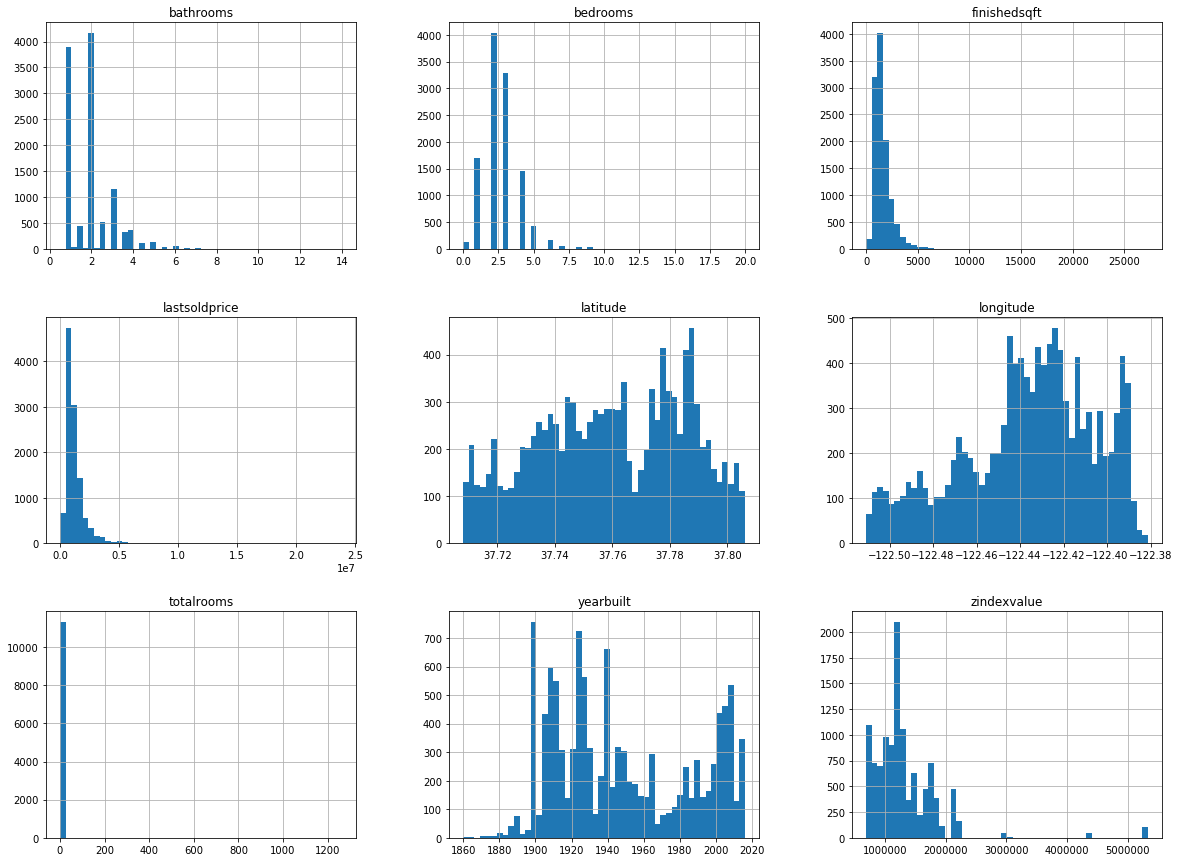

In [14]:
data.hist(bins=50,figsize=(20,15))
plt.savefig("Attribute_histogram_plots")
plt.show()

### Some of the histograms are a little bit right skewed, but this is not abnormal.

### Let’s create a scatter plot with latitude and longitude to visualize the data:



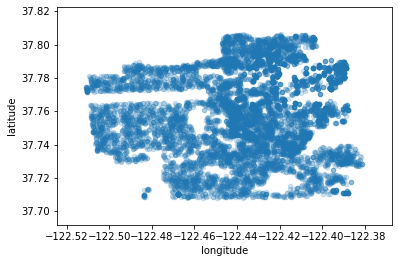

In [15]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)
plt.savefig("map1.png")

### Now color code from the most expensive to the least expensive areas:

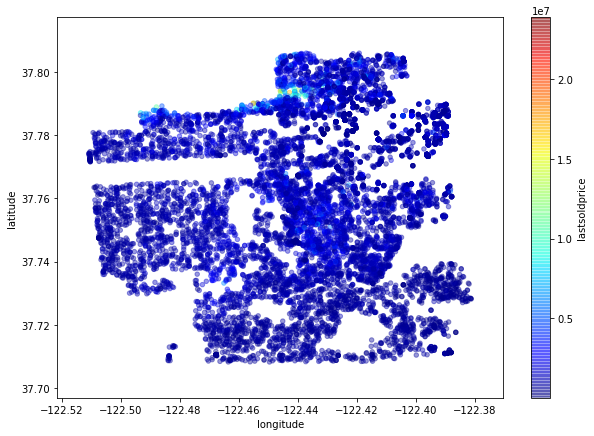

In [16]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,figsize=(10,7),c="lastsoldprice",cmap="jet",colorbar=True,sharex=False)  #cmap=plt.get_cmap("jet") also used
plt.savefig("map2.png")

### This image tells us that the most expensive houses sold were in the north area.



### The variable we are going to predict is the “last sold price”. So let’s look at how much each independent variable correlates with this dependent variable.



In [17]:
corr_matrix=data.corr()
corr_matrix

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
bathrooms,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.249193
bedrooms,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.164981
finishedsqft,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.338131
lastsoldprice,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.460429
latitude,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.393080
longitude,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.188348
totalrooms,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.043554
yearbuilt,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.219629
zindexvalue,0.249193,0.164981,0.338131,0.460429,0.393080,-0.188348,0.043554,-0.219629,1.000000


In [18]:
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

### The last sold price tends to increase when the finished sqft and the number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. And finally, coefficients close to zero indicates that there is no linear correlation.

### We are now going to visualize the correlation between variables by using Pandas’ scatter_matrix function. We will just focus on a few promising variables, that seem the most correlated with the last sold price.

In [19]:
from pandas.plotting import scatter_matrix

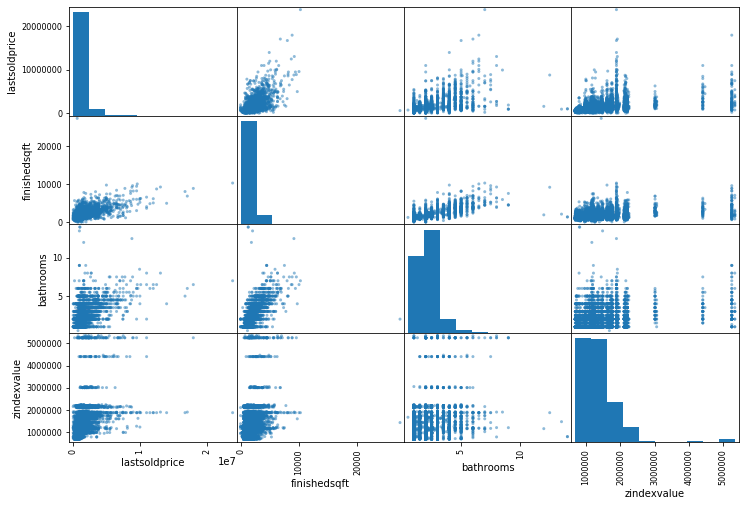

In [20]:
attributes=["lastsoldprice","finishedsqft","bathrooms","zindexvalue"]
scatter_matrix(data[attributes],figsize=(12,8))
plt.savefig("matrix.png")

### The most promising variable for predicting the last sold price is the finished sqft, so let’s zoom in on their correlation scatter plot.

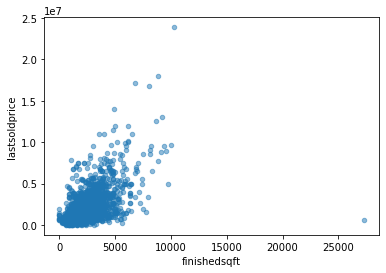

In [21]:
data.plot(kind="scatter",x="finishedsqft",y="lastsoldprice",alpha=0.5)
plt.savefig("scatter.png")

### The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.



### Because each house has different square footage and each neighborhood has different home prices, what we really need is the price per sqft. So, we add a new variable “price_per_sqft”. We then check to see how much this new independent variable correlates with the last sold price.

In [22]:
data['price_per_sqft']=data['lastsoldprice']/data['finishedsqft']

corr_matrix=data.corr()
#corr_matrix
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

### Unfortunately, the new price_per_sqft variable shows only a very small positive correlation with the last sold price. But we still need this variable for grouping neighborhoods.



### There are 71 neighborhoods in the data, and we are going to group them.



In [23]:
len(data['neighborhood'].value_counts())

71

### The following steps cluster the neighborhood into three groups: 
>1. low price; 
>2. high price low frequency; 
>3. high price high frequency.

In [24]:
freq=data.groupby('neighborhood').count()['address']
#freq
mean=data.groupby('neighborhood').mean()['price_per_sqft']
#mean
cluster=pd.concat([freq,mean],axis=1)
#cluster
cluster['meighborhood']=cluster.index
cluster.columns=['freq','price_per_sqft','neighborhood']
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


### These are the low price neighborhoods:

In [25]:
cluster1=cluster[cluster.price_per_sqft<756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

### These are the high price and low frequency neighborhoods:

In [26]:
cluster_temp=cluster[cluster.price_per_sqft>=756]
cluster2=cluster_temp[cluster_temp.freq<123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

### These are the high price and high frequency neighborhoods:

In [27]:
cluster3=cluster_temp[cluster_temp.freq>=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

### We add a group column based on the clusters:



In [28]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'

data['group']=data.neighborhood.apply(get_group)

### After performing the above pre-processing, we do not need the following columns anymore: “address, lastsolddate, latitude, longitude, neighborhood, price_per_sqft”, so we drop them from our analysis.



In [29]:
data.drop(data.columns[[0,4,6,7,8,13]],axis=1,inplace=True)
data=data[['bathrooms','bedrooms','finishedsqft','totalrooms','usecode','yearbuilt','zindexvalue','group','lastsoldprice']]
data.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq,1530000.0


### Our data looks good now

### But before we build the model, we need to create dummy variables for these two categorical variables: “usecode” and “group”.

In [30]:
X=data[['bathrooms','bedrooms','finishedsqft','totalrooms','usecode','yearbuilt','zindexvalue','group']]
Y=data['lastsoldprice']

n=pd.get_dummies(data.group)
X=pd.concat([X,n],axis=1)
m=pd.get_dummies(data.usecode)
X=pd.concat([X,m],axis=1)
drops=['group','usecode']
X.drop(drops,inplace=True,axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,high_price_high_freq,high_price_low_freq,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,1,0,0,0,0,0,0,0,0,0,0,1,0


# Train and Build Model

# 1. Linear Regression model

### Split the data

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

### Train the model

In [32]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Done! We now have a working Linear Regression model.



## Calculate R squared:



In [33]:
y_pred=reg.predict(X_test)
print('Linear Regression R squared: %.4f'%reg.score(X_test,y_test))

Linear Regression R squared: 0.5619


### So, in our model, 56.19% of the variability in Y can be explained using X. This is not that exciting.

## Calculate root-mean-square error (RMSE):



In [71]:
from sklearn.metrics import mean_squared_error

#find mean square error
lin_mse=mean_squared_error(y_pred,y_test)

# find root mean square error
lin_rmse=np.sqrt(lin_mse)

print('Linear Regression RMSE: %.4f'%lin_rmse)

Linear Regression RMSE: 543066.6069


### Our model was able to predict the value of every house in the test set within $616071 of the real price.

## Calculate mean absolute error (MAE):



In [38]:
from sklearn.metrics import mean_absolute_error

lin_mae=mean_absolute_error(y_pred,y_test)
print("Linear Regression MAE: %.4f"%lin_mae)

Linear Regression MAE: 363742.1631


---
# 2. Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(random_state=42)
#fit the model
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [46]:
print("Random Forest R Sqaured: %.4f"%forest_reg.score(X_test,y_test))

Random Forest R Sqaured: 0.6885


In [74]:
y_pred=forest_reg.predict(X_test)
# Mean Squared Error
forest_mse=mean_squared_error(y_pred,y_test)
print("Random Forest MSE  : %.4f"%forest_mse)

# root mean sqaured error
forest_rmse=np.sqrt(forest_mse)
print("Random Forest RMSE : %.4f"%forest_rmse)

Random Forest MSE  : 269858364166.8789
Random Forest RMSE : 519478.9352


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

# 3. Gradient Boosting Model

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()
# fit train data into model
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### R sqaured

In [55]:
print("Gradient Boosting R sqaured: %.4f"%model.score(X_test,y_test))

Gradient Boosting R sqaured: 0.6596


### MSE & RMSE errors

In [61]:
y_pred=model.predict(X_test)

# MSE
model_mse=mean_squared_error(y_pred,y_test)
print("Gradient Boosting MSE : %.4f"%model_mse)

#RMSE
model_rmse=np.sqrt(model_mse)
print("Gradient Boosting RMSE: %.4f"%model_rmse)

Gradient Boosting MSE : 294921339562.3098
Gradient Boosting RMSE: 543066.6069


### These are the best results we got so far, so, I would consider this is our final model.



---
## Feature Importance

### We have used 19 features (variables) in our model. Let’s find out which features are important and vice versa.



In [62]:
data.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode',
       'yearbuilt', 'zindexvalue', 'group', 'lastsoldprice'],
      dtype='object')

In [66]:
feature_labels=np.array(['bathrooms','bedrooms','finishedsqft','totalrooms',
                         'yearbuilt','zindexvalue','high_price_high_freq',
                         'high_price_low_freq','low_price','Apartment',
                         'Condominium','Cooperative','Duplex','Miscellaneous',
                         'mobile','MultiFamily2To4','MultiFamily5Plus',
                         'SingleFamily','Townhouse'
                        ])

importance=model.feature_importances_
feature_indexes_by_importance=importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index],(importance[index]*100.0)))

Apartment-0.00%
MultiFamily5Plus-0.00%
mobile-0.00%
Miscellaneous-0.00%
Cooperative-0.00%
Townhouse-0.00%
high_price_low_freq-0.13%
Condominium-0.13%
Duplex-0.15%
MultiFamily2To4-0.28%
bedrooms-0.44%
high_price_high_freq-0.98%
yearbuilt-1.15%
totalrooms-2.31%
SingleFamily-5.19%
low_price-6.10%
bathrooms-13.16%
zindexvalue-17.79%
finishedsqft-52.19%


In [67]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft',
                           'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq',
                           'low_price', 'Apartment', 'Condominium',
                           'Cooperative','Duplex', 'Miscellaneous',
                           'Mobile', 'MultiFamily2To4', 
                           'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Apartment-0.00%
MultiFamily5Plus-0.00%
Mobile-0.00%
Miscellaneous-0.00%
Cooperative-0.00%
Townhouse-0.00%
high_price_low_freq-0.13%
Condominium-0.13%
Duplex-0.15%
MultiFamily2To4-0.28%
bedrooms-0.44%
high_price_high_freq-0.98%
yearbuilt-1.15%
totalrooms-2.31%
SingleFamily-5.19%
low_price-6.10%
bathrooms-13.16%
zindexvalue-17.79%
finishedsqft-52.19%


### The most important features are finished sqft, zindex value, number of bathrooms, total rooms, year built and so on. And the least important feature is Apartment, which means that regardless of whether this unit is an apartment or not, does not matter to the sold price. Overall, most of these 19 features are used.

